In [24]:
from urllib.request import urlopen
import pandas as pd
from bs4 import BeautifulSoup


url = 'http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html'
html = urlopen(url)
soup = BeautifulSoup(html, 'lxml')

tbodySoup = soup.tbody
trSoup = tbodySoup.find_all('tr')[1:]

numbers = []
heights = []
weights = []

def convert_to_sm(inches):
    return inches*2.54
def convert_to_kg(pounds):
    return pounds*0.4336
                  

for tr in trSoup:
    tdSoup = tr.findAll('td')
    #if tdSoup[0].text!='':
        #numbers.append(tdSoup[0].text)
    if tdSoup[1].text!='':
        heights.append(float(tdSoup[1].text))
    if tdSoup[2].text!='':
        weights.append((float(tdSoup[2].text)))

df = pd.DataFrame(list(zip(heights, weights)), columns=['heights', 'weights'])

print(df)


        heights   weights
0      65.78331  112.9925
1      71.51521  136.4873
2      69.39874  153.0269
3      68.21660  142.3354
4      67.78781  144.2971
...         ...       ...
24995  69.50215  118.0312
24996  64.54826  120.1932
24997  64.69855  118.2655
24998  67.52918  132.2682
24999  68.87761  124.8742

[25000 rows x 2 columns]


In [25]:
df.to_csv('height_width',index = False);

In [26]:
df = pd.read_csv('height_width')
df

,heights,weights
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971
...,...,...
24995,69.50215,118.0312
24996,64.54826,120.1932
24997,64.69855,118.2655
24998,67.52918,132.2682


In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

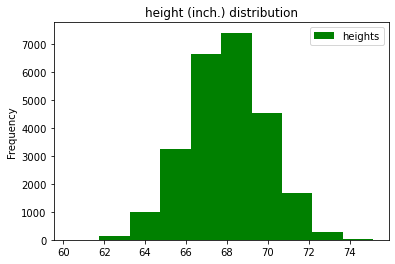

In [28]:
df.plot(y='heights', kind='hist',
color='green', title='height (inch.) distribution');

In [41]:
#index массы тела BMI
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
            (height_inch / METER_TO_INCH) ** 2


df['BMI'] = df.apply(lambda row: make_bmi(row['heights'],row['weights']), axis=1)
print(df)

        heights   weights        BMI
0      65.78331  112.9925  18.357573
1      71.51521  136.4873  18.762577
2      69.39874  153.0269  22.338895
3      68.21660  142.3354  21.504526
4      67.78781  144.2971  22.077581
...         ...       ...        ...
24995  69.50215  118.0312  17.178982
24996  64.54826  120.1932  20.281866
24997  64.69855  118.2655  19.863971
24998  67.52918  132.2682  20.392458
24999  68.87761  124.8742  18.506047

[25000 rows x 3 columns]


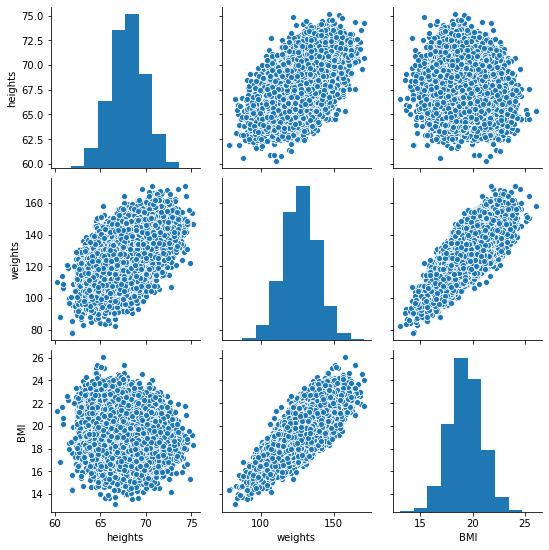

In [42]:
plot3 = sns.pairplot(df)

In [45]:
def weight_category(weight):
    pass
    if weight<(120):
        return 1
    elif weight >=(150):
        return 3
    else:
        return 2
   


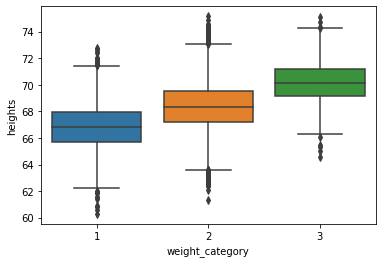

In [46]:

df['weight_category'] = df['weights'].apply(weight_category)
#sns.boxplot(data=data, x="weight_cat", y="Height").set(xlabel = u"Весовая категория", ylabel = u"Рост")

sns.boxplot(data=df, x='weight_category' , y= 'heights')

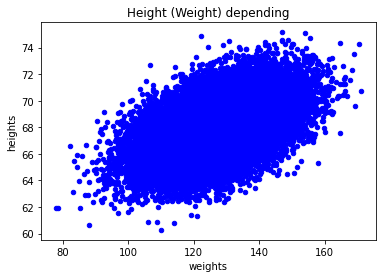

In [47]:
df.plot(y='heights',x='weights', kind='scatter', 
           color='blue',  title='Height (Weight) depending')

In [48]:
def error(w0, w1):
    s=0
    x=df['weights']
    y=df['heights']
    for i in range(1,len(df.index)):
        s+=(y[i]-w0-w1*x[i])**2
    return s


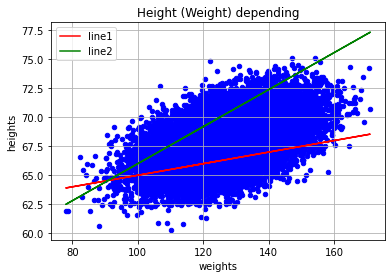

In [49]:
    
x=np.array(df['weights'])
w0,w1=(60) ,(0.05)
y1 = [w0+t*w1 for t in x]

w0,w1=(50), (0.16)
y2 = [w0+t*w1 for t in x]

df.plot(y='heights',x='weights', kind='scatter', 
           color='blue',  title='Height (Weight) depending')

plt.plot(x, y1, color="red", label="line1")
plt.plot(x, y2, color="green", label="line2")
plt.grid(True)
plt.legend(loc='upper left')

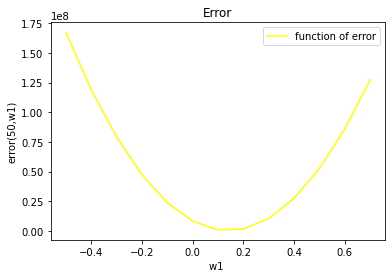

In [51]:
w0=50.
w = np.arange(-0.5, 0.8, 0.1)

err = [error(w0,w1) for w1 in w]
plt.title('Error')
plt.xlabel('w1 ')
plt.ylabel('error(50,w1)')

plt.plot(w, err, color="yellow", label="function of error")
plt.legend()

In [52]:
import scipy
from scipy.optimize import minimize_scalar

def error50(w1):
    return error(50,w1)

min=minimize_scalar(error50, bounds=(-5,5), method='bounded')
w1_opt=min.x
min.x, min.fun

(0.14109208141865182, 79512.19192397092)

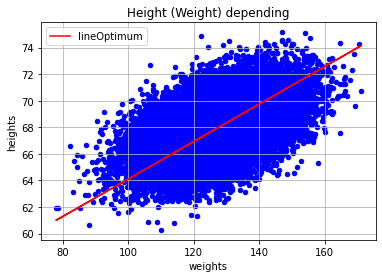

In [57]:
x=np.array(df['weights'])

w0,w1=50,w1_opt
y = [w0+t*w1 for t in x]

#xx = np.linspace(np.min(data['Weight']),np.max(data['Weight']),data.count)
df.plot(y='heights',x='weights', kind='scatter', 
           color='blue',  title='Height (Weight) depending')

plt.plot(x, y, color="red", label="lineOptimum")

plt.grid(True)
plt.legend(loc='upper left')

In [58]:
from mpl_toolkits.mplot3d import Axes3D

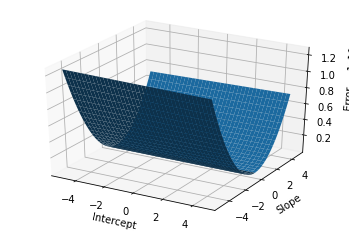

In [59]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis


w0 = np.arange(-5, 5, 0.25)
w1 = np.arange(-5, 5, 0.25)
W0, W1 = np.meshgrid(w0, w1)
E = error(W0,W1)

# используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(W0, W1, E)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()


In [65]:
def error1(w):
    s=0.
    x=df['weights']
    y=df['heights']
    for i in range(1,len(df.index)):
     s+=(y[i]-w[0]-w[1]*x[i])**2
    return s

import scipy.optimize as optimize
min = optimize.minimize(error1, np.array([0,0]), method = 'L-BFGS-B', bounds=((-100,100),(-5, 5)))

min.x, min.fun

(array([57.57231214,  0.0820026 ]), 67544.1748077074)

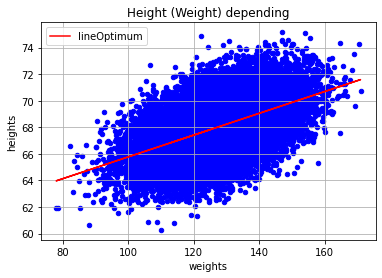

In [67]:
x=np.array(df['weights'])

w0,w1=min.x
y = [w0+t*w1 for t in x]

df.plot(y='heights',x='weights', kind='scatter', 
           color='blue',  title='Height (Weight) depending')

plt.plot(x, y, color="red", label="lineOptimum")

plt.grid(True)
plt.legend(loc='upper left')